# make the 12c vs 11/10c correction

In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy
import csv
from matplotlib import pyplot as plt


In [2]:
def cs_iso_corr(filename,thickness):
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","iso_corr_factor"])
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    energy_vals = ["400","550","650","800"]
    list_thick = []
    list_medium = []
    list_thin = []
    #print(df)
    for ene in energy_vals:
        #print(float(df.loc[(df["targettype"] == "c_2198")& (df["energy"] == float(ene))]["geo_corr_factor"]))
        #print(float(df.loc[(df["targettype"] == "empty")& (df["energy"] == float(ene))]["geo_corr_factor"]))
        thick_val = float(df.loc[(df["targettype"] == "c_2198")& (df["energy"] == float(ene))]["iso_corr_factor"])
        medium_val= float(df.loc[(df["targettype"] == "c_1086")& (df["energy"] == float(ene))]["iso_corr_factor"])
        thin_val = float(df.loc[(df["targettype"] == "c_54")& (df["energy"] == float(ene))]["iso_corr_factor"])
        empty_val = float(df.loc[(df["targettype"] == "empty")& (df["energy"] == float(ene))]["iso_corr_factor"])
        corr_thick = -factor_2198*math.log((1-thick_val)/(1-empty_val))
        corr_medium = -factor_1086*math.log((1-medium_val)/(1-empty_val))
        corr_thin = -factor_54*math.log((1-thin_val)/(1-empty_val))
        list_thick.append(corr_thick)
        list_medium.append(corr_medium)
        list_thin.append(corr_thin)
        
    if (thickness == "thick"):
        return list_thick
    if (thickness == "medium"):
        return list_medium
    if (thickness == "thin"):
        return list_thin

In [3]:
f_name = "res_right_side_geo_corr.txt"
iso_corr_thick = cs_iso_corr(f_name,"thick")
iso_corr_medium = cs_iso_corr(f_name,"medium")
iso_corr_thin = cs_iso_corr(f_name,"thin")

### ok this is actually not the right side, but the left side

Text(0.5, 1.0, 'Isotope Correction Factor')

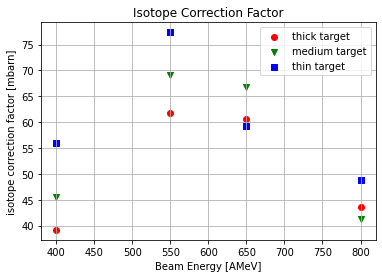

In [4]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor")
#plt.savefig('corig_geo_corr_factor.png')

## with the default values

In [5]:
f_name_def = "default_iso_corr.txt"
def_iso_corr_thick = cs_iso_corr(f_name_def,"thick")
def_iso_corr_medium = cs_iso_corr(f_name_def,"medium")
def_iso_corr_thin = cs_iso_corr(f_name_def,"thin")


Text(0.5, 1.0, 'Isotope Correction Factor')

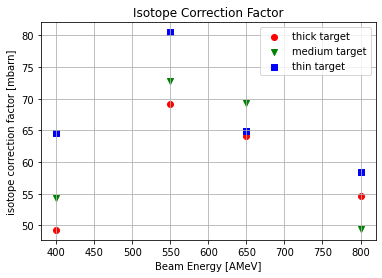

In [6]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor")

## now not using cluster data, but raw data, no cuts on mw12

In [7]:
f_name_raw = "res_right_no_cluster_no_cut_iso_corr.txt"
raw_iso_corr_thick = cs_iso_corr(f_name_raw,"thick")
raw_iso_corr_medium = cs_iso_corr(f_name_raw,"medium")
raw_iso_corr_thin = cs_iso_corr(f_name_raw,"thin")

### ok this is actually not the right side but the left side

Text(0.5, 1.0, 'Isotope Correction Factor TWIN Music')

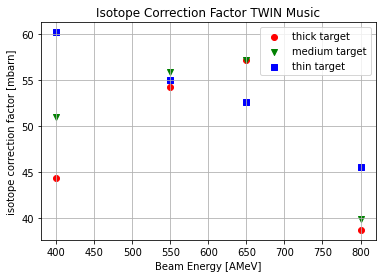

In [8]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,raw_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,raw_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,raw_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")

## now not using cluster data, but raw data, no cuts on mw12, RIGHT SIDE

Text(0.5, 1.0, 'Isotope Correction Factor TWIN Music')

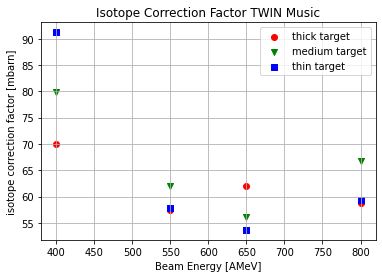

In [9]:
f_name_raw = "res_correct_right_side_no_cuts_no_cluster_iso_corr.txt"
raw_iso_corr_thick = cs_iso_corr(f_name_raw,"thick")
raw_iso_corr_medium = cs_iso_corr(f_name_raw,"medium")
raw_iso_corr_thin = cs_iso_corr(f_name_raw,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,raw_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,raw_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,raw_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")

## now using cluster data, RIGHT SIDE

(43.0, 90.0)

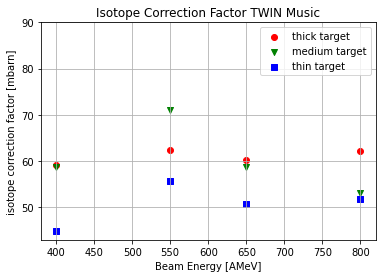

In [10]:
f_name_cluster = "res_correct_right_own_cluster.txt"
cluster_iso_corr_thick = cs_iso_corr(f_name_cluster,"thick")
cluster_iso_corr_medium = cs_iso_corr(f_name_cluster,"medium")
cluster_iso_corr_thin = cs_iso_corr(f_name_cluster,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,cluster_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,cluster_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,cluster_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

## ok before it was with mw1 vs mw3 now it is mw2 vs mw3

(43.0, 90.0)

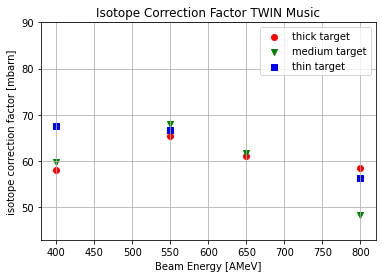

In [11]:
f_name_cluster_mw23 = "res_iso_corr_own_cluster_mw23.txt"
cluster_iso_corr_thick_mw23 = cs_iso_corr(f_name_cluster_mw23,"thick")
cluster_iso_corr_medium_mw23 = cs_iso_corr(f_name_cluster_mw23,"medium")
cluster_iso_corr_thin_mw23 = cs_iso_corr(f_name_cluster_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,cluster_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,cluster_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,cluster_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

### no cluster now

Text(0.5, 1.0, 'Isotope Correction Factor TWIN Music')

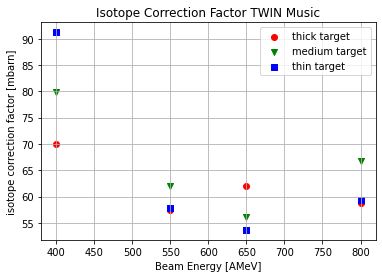

In [12]:
f_name_def_mw23 = "res_mw23_no_cluster_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
#ax.set_ylim(43,90)

## own cluster mw23 and start from bin right to mean value

(43.0, 90.0)

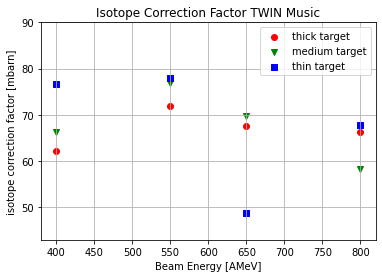

In [13]:
f_name_def_mw23 = "res_mw23_own_clusterplus_bin_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

## own cluster mw23 and start from bin left to mean value

(43.0, 90.0)

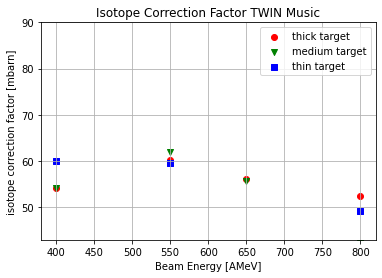

In [14]:
f_name_def_mw23 = "res_mw23_own_clusterminus_bin_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

### ok really fancy, just using fourth quadrant to be sure no acceptance issue

Text(0.5, 1.0, 'Isotope Correction Factor TWIN Music')

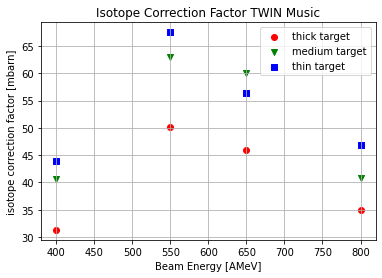

In [18]:
f_name_def_mw23 = "prelim_fourth_plus_one_y_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
#ax.set_ylim(43,90)